In [ ]:
# powtorka scipy z ksiazki Analiza danych w py

In [4]:
import scipy
import scipy.stats as stats
import numpy as np
import statsmodels
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [129]:
from scipy.stats  import norm 

#[size=1,loc=0,scale=0,random_state=None]
random_variates = norm.rvs(100)

#[x=DATA,loc=0,scale=0]
cumulative_dist_func = norm.cdf(0)

#[x=DATA,loc=0,scale=0]
propability_density_func = norm.pdf(0)

print("random_variates", random_variates)
print("cumulative_dist_func", cumulative_dist_func)
print("propability_density_func", propability_density_func)

random_variates 98.8242810447
cumulative_dist_func 0.5
propability_density_func 0.398942280401


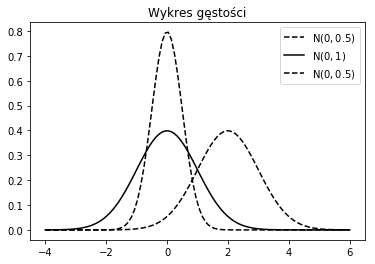

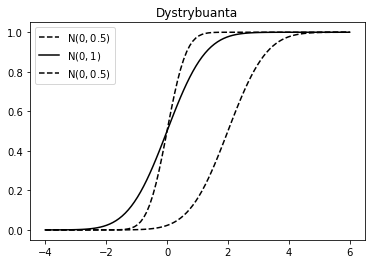

In [10]:
# Wykres gęstości oraz dystrybuanty dla rozkladow N(0;0,5),N(0;1), N(2; 1)
# [tu chodziło o loc / scale z N(symbol, symbol2]
# jakie sa najwazniejsze przekształcenia?
# czemu start od loc sca,el co stanowi o ich wadze?


stats.norm.cdf(0)
stats.norm.pdf([0,1,2], loc=1, scale=2)

x = np.linspace(-4, 6, 100)
plt.plot(x, stats.norm.pdf(x, scale=0.5), "k--", label=r"$\mathrm{N}(0, 0.5)$")
plt.plot(x, stats.norm.pdf(x), "k-", label=r"$\mathrm{N}(0, 1)$")
plt.plot(x, stats.norm.pdf(x, 2, 1), "k--", label=r"$\mathrm{N}(0, 0.5)$")
plt.title("Wykres gęstości")
plt.legend()
plt.show()

x = np.linspace(-4, 6, 100)
plt.plot(x, stats.norm.cdf(x, scale=0.5), "k--", label=r"$\mathrm{N}(0, 0.5)$")
plt.plot(x, stats.norm.cdf(x), "k-", label=r"$\mathrm{N}(0, 1)$")
plt.plot(x, stats.norm.cdf(x, 2, 1), "k--", label=r"$\mathrm{N}(0, 0.5)$")
plt.title("Dystrybuanta")
plt.legend()
plt.show()

In [8]:
# Wartość oczekiwana, mediana i kwartyle, wariancje, odchylenie standardowe, kurtoze i skonsosc 
# rozkladu wykladniczego z lambda=2

e = stats.expon(scale=0.5)
e_stats = {
'mean'       : e.mean(),
'median'     : e.median(),
'first 0.25' : e.ppf(0.25),
'first 0.75' : e.ppf(0.75),
'variance'   : e.var(),
'std'        : e.std(),
'kurtosis'   : e.stats(moments="s"),
'skosnosc'   : e.stats(moments="k"),
'std/var/k/s': e.stats(moments="mvsk")
}

just_a_print = [print("{:<12}:  {}".format(k, v)) for k, v in e_stats.items()] # no result ofc

mean        :  0.5
median      :  0.34657359027997264
first 0.25  :  0.14384103622589045
first 0.75  :  0.6931471805599453
variance    :  0.25
std         :  0.5
kurtosis    :  2.0
skosnosc    :  6.0
std/var/k/s :  (array(0.5), array(0.25), array(2.0), array(6.0))


In [9]:
# Prawdopodobieństwo uzyskania wiecej niż 3 orłów w 11 rzutach moneta

b = stats.binom(n=11, p=0.5)
solution = 1-b.cdf(3)
solution = 1-np.sum(b.pmf(np.array([0,1,2,3])))  # also ok
solution

0.88671874999999989

In [25]:
# X to liczba rzutow ktore wykonalismy przed uzyskaniem "1", ma rozklad geometryczny z param
# p = 0.25, P(X >= 4) == P(X > 3) = 1-P(X <= 3)

solution = 1 - stats.geom.cdf(3, p=0.25)
solution

0.421875

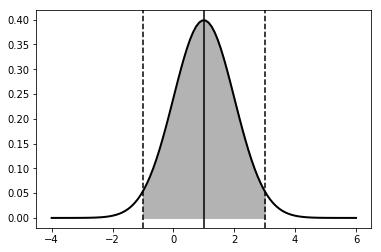

In [33]:
# Zaprezentuj graficznie regule 5% dla rozkładu normalnego

fn = stats.norm(loc=1, scale=1) # N(1, 1)
x = np.linspace(-4, 6, 100, endpoint=True)

plt.plot(x, fn.pdf(x), "k-", lw=2)

plt.axvline(fn.mean(), color="k")
plt.axvline(fn.mean()-2*fn.std(), color="k", ls="--")
plt.axvline(fn.mean()+2*fn.std(), color="k", ls="--")

z = np.linspace(fn.mean()-2*fn.std(), fn.mean()+2*fn.std(), 100)
plt.fill_between(z, 0, fn.pdf(z), color="0.7")
plt.show()

In [103]:
# Simple Monte Carlo
import time
import numpy as np
import scipy.stats as stats

# Initial
fn = stats.norm(loc=1, scale=1) # Normal dist
N = 10000 # N iteracji MC
P = (3-(-1))*(0.4-0) # randomowe powalone pole
y = np.zeros(N) # Matrix

# WAY 1: Simple geometric Montec Carlo hit or miss
for i in range(1,N):
    before = time.time() #
    u1 = np.random.uniform(-1, 3, 1)  # point from a dist
    u2 = np.random.uniform(0, 0.4, 1) # point from a dist
    y[i] = (u2 <= fn.pdf(u1))         # decider if point "got below" a plot
sol1 = np.mean(y)*P

# WAY 2: Scipy numeric integrate
import scipy.integrate
sol2 = scipy.integrate.quad(fn.pdf, -1, 3) # (value, error estimation)

print("way 1 val:", abs(sol1))
print("way 2 val:", sol2[0])

way 1 val: 0.95888
way 2 val: 0.9544997361036417
